In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('synthetic_customer_data.csv')
print(data.describe())

        CustomerID          Age  MonthlyCharges  TotalCharges       Tenure  \
count  5000.000000  5000.000000     5000.000000   4500.000000  5000.000000   
mean   2500.500000    48.805600       72.864946   4064.661300    35.912200   
std    1443.520003    17.906991       42.938178   2234.625789    20.305185   
min       1.000000    18.000000       20.010000    201.370000     1.000000   
25%    1250.750000    34.000000       45.895000   2119.962500    19.000000   
50%    2500.500000    49.000000       70.600000   4052.585000    36.000000   
75%    3750.250000    64.000000       95.282500   5934.187500    53.000000   
max    5000.000000    79.000000      586.100000   7999.160000    71.000000   

       AverageMonthlyCharges  CustomerLifetimeValue  
count            5000.000000            5000.000000  
mean              264.829010            2499.276320  
std               582.902571            1834.562893  
min                 3.116418              23.210000  
25%                59.25025

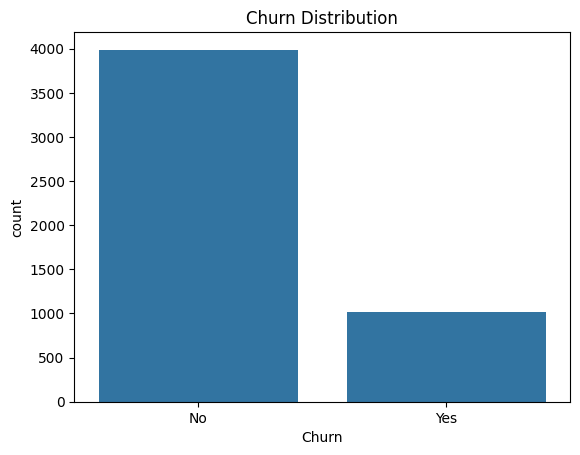

In [8]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

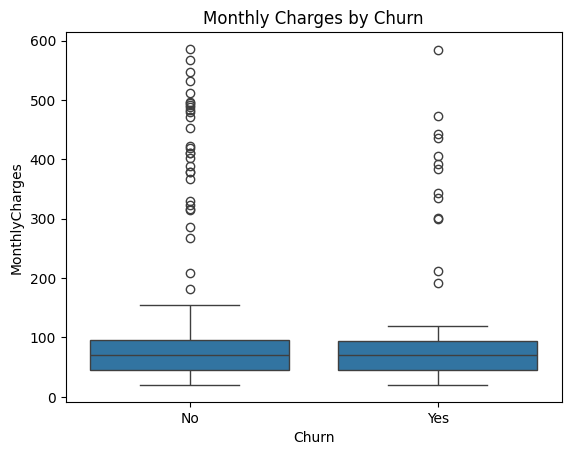

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn')
plt.show()

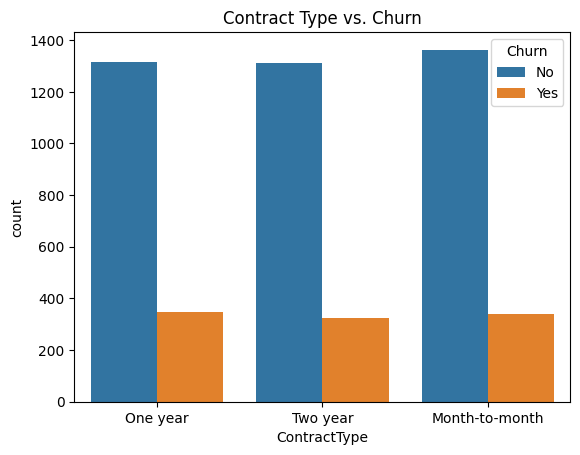

In [10]:
sns.countplot(x='ContractType', hue='Churn', data=data)
plt.title('Contract Type vs. Churn')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
#Data Preprocessing
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

X = data.drop(columns=['CustomerID', 'Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8920\20091009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [19]:
#logistic regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Logistic Regression Accuracy: 0.806
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       806
           1       0.00      0.00      0.00       194

    accuracy                           0.81      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.65      0.81      0.72      1000

Logistic Regression Confusion Matrix:
 [[806   0]
 [194   0]]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
#Evaluate Desicion Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

Decision Tree Accuracy: 0.802
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       806
           1       0.00      0.00      0.00       194

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.65      0.80      0.72      1000

Decision Tree Confusion Matrix:
 [[802   4]
 [194   0]]


In [21]:
import seaborn as sns

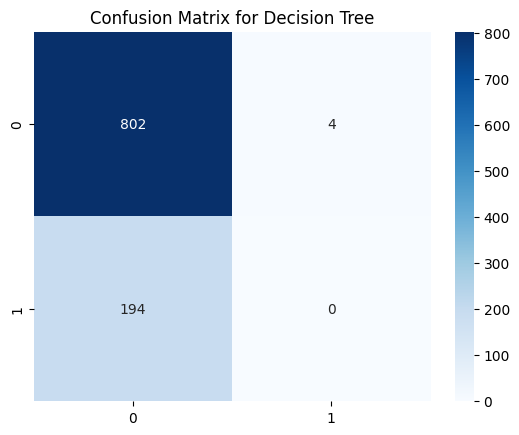

In [22]:
best_model = dt_model

# Confusion matrix
cm = confusion_matrix(y_test, dt_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [23]:

feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)



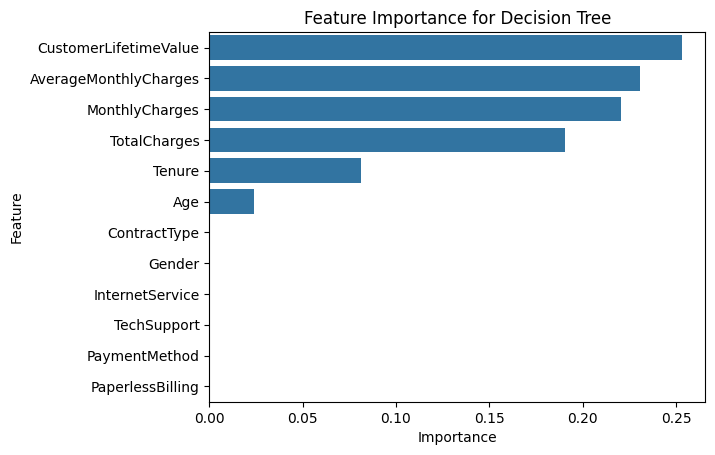

In [24]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Decision Tree')
plt.show()